# Exploring r/redpillwomen submisions and comments

## Libraries & Setup

### Install

In [1]:
%pip install pandas numpy==1.24 matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install bertopic #[spacy]

Note: you may need to restart the kernel to use updated packages.


### Imports

In [3]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

/Users/tilmankerl/Documents/UNI/SICSS/reddit-pills/.venv/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/tilmankerl/Documents/UNI/SICSS/reddit-pills/.venv/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/tilmankerl/Document

### General configs

In [5]:
# matplotlib theme
plt.style.use('ggplot')

### Data loading

In [6]:
# get DATA_DIR
DATA_DIR = os.path.join(Path(os.path.abspath("")).parent, "data")
print(DATA_DIR)

/Users/tilmankerl/Documents/UNI/SICSS/reddit-pills/data


In [26]:
submission_redpill = pd.read_csv(
    f"{DATA_DIR}/output/RedPillWomen_submissions.csv",
    names=["score", "date", "title", 'author_flair_text','link_flair_text','locked','num_comments','over_18','hide_score','num_crossposts', "author","link", "body"]
)
comments_redpill = pd.read_csv(
    f"{DATA_DIR}/output/RedPillWomen_comments.csv",
    names=["score", "date", "is_submitter", "author","link", "body"]
)

In [27]:
# feature types
submission_redpill.date = pd.to_datetime(submission_redpill.date)
comments_redpill.date = pd.to_datetime(comments_redpill.date)

## Exploration

### Submissions

We start our exploraiton by looking into NA values and duplicates.

In [22]:
submission_redpill.head()

,score,date,title,author_flair_text,link_flair_text,locked,num_comments,over_18,hide_score,num_crossposts,author,link,body
0,18,2017-08-01,My boyfriend prefers a different type of beaut...,NaN,DATING ADVICE,False,51,False,False,0,u/sheikha4teddies,https://www.reddit.com/r/RedPillWomen/comments...,"My boyfriend had dated a handful of girls, he'..."
1,1,2017-08-01,Odd duck.,NaN,NaN,False,1,False,False,0,u/queue_banjo,https://www.reddit.com/r/RedPillWomen/comments...,[removed]
2,52,2017-08-01,We've Developed Orbiters - Invasion of the Men,"27, married ~2 years",NaN,True,23,False,False,0,u/ModernClassicLady,https://www.reddit.com/r/RedPillWomen/comments...,[removed]
3,2,2017-08-01,I do not even know what to say,NaN,NaN,False,7,False,False,0,u/[deleted],https://www.reddit.com/r/RedPillWomen/comments...,[removed]
4,10,2017-08-01,Is this relationship red pill?,NaN,DATING ADVICE,False,8,False,False,0,u/[deleted],https://www.reddit.com/r/RedPillWomen/comments...,[deleted]


In [23]:
# get NAs
submission_redpill.isna().sum()

score                   0
date                    0
title                   0
author_flair_text    8763
link_flair_text      3629
locked                  0
num_comments            0
over_18                 0
hide_score              0
num_crossposts          0
author                  0
link                    0
body                   51
dtype: int64

Plot avergae length of body text

Text(0.5, 1.0, 'Distribution of body text length for submissions')

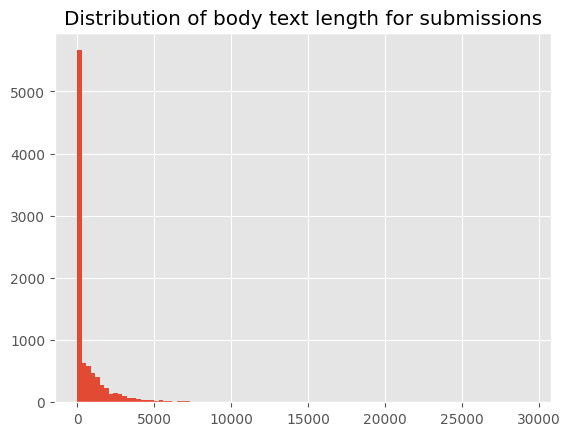

In [11]:
submission_redpill.body.str.len().hist(
    bins=100    
).set_title("Distribution of body text length for submissions")

Plot posts over time:

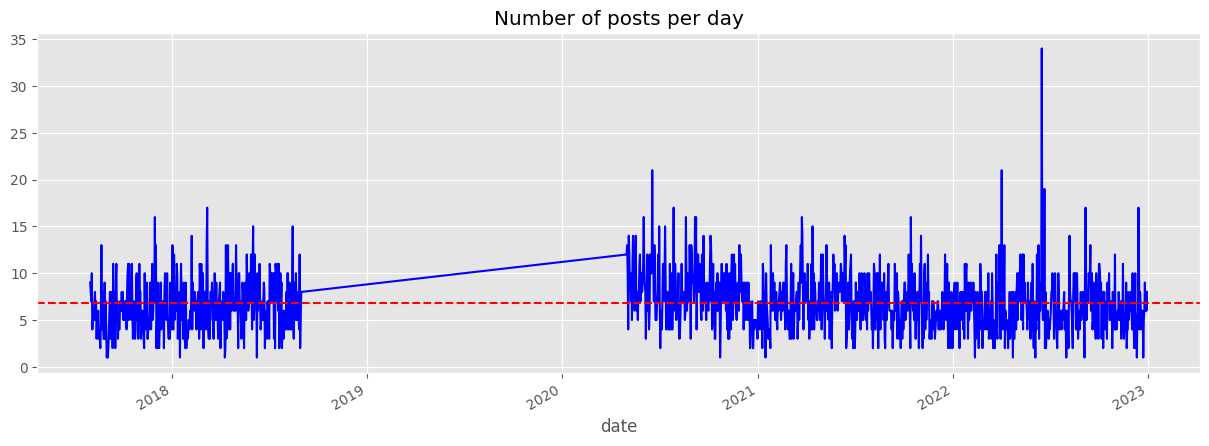

In [12]:
#Plot posts over time:
submission_redpill.date.value_counts().sort_index().plot(
    kind='line',
    title="Number of posts per day",
    figsize=(15, 5),
    # color
    color='b',
)

# add average line
plt.axhline(submission_redpill.date.value_counts().mean(), color='r', linestyle='--')

In [13]:
# get date with highest number of posts
submission_redpill.groupby('date').count().sort_values(by='author', ascending=False).head(1)

,score,title,author_flair_text,link_flair_text,locked,num_comments,over_18,hide_score,num_crossposts,author,link,body
date,,,,,,,,,,,,
2022-06-17,34,34,0,28,34,34,34,34,34,34,34,34


### Comments

In [28]:
comments_redpill.head()

,score,date,is_submitter,author,link,body
0,2,2017-10-01,False,u/etf42,https://www.reddit.com/r/RedPillWomen/comments...,Men have always been more disposable due to th...
1,1,2017-10-01,False,u/throwawayklutch,https://www.reddit.com/r/RedPillWomen/comments...,"To me, these women seem like they just have no..."
2,2,2017-10-01,False,u/SouthernAthena,https://www.reddit.com/r/RedPillWomen/comments...,That attitude will get them far in life. But y...
3,8,2017-10-01,False,u/platewrecked,https://www.reddit.com/r/RedPillWomen/comments...,"Greg the OP is a suicidal, drug addled, datele..."
4,2,2017-10-01,False,u/thelampshade25,https://www.reddit.com/r/RedPillWomen/comments...,Very funny video i was loling the whole time


In [24]:
# get NAs
comments_redpill.isna().sum()

score           0.0
date            0.0
is_submitter    0.0
author          0.0
link            0.0
body            0.0
dtype: float64

## Brief Topic modelling using BERTopic

Topic-specific preprocessing

In [32]:
submission_redpill_topic = submission_redpill.copy()

print("Before processing:")
print(submission_redpill_topic.shape)

# drop body NAs
submission_redpill_topic = submission_redpill_topic.dropna(subset=['body'])

# drop link duplicates
submission_redpill_topic = submission_redpill_topic.drop_duplicates(subset=['link'])

# remove double spaces & new lines from body
submission_redpill_topic['body'] = submission_redpill_topic['body'].str.replace('\n', ' ')
submission_redpill_topic['body'] = submission_redpill_topic['body'].str.replace('  ', ' ')

# intriduce doc_text column (concat title and body)
submission_redpill_topic['doc_text'] = submission_redpill_topic['title'] + ' ' + submission_redpill_topic['body']

# drop doc_text where num tokens >= 50 and <= 1000
submission_redpill_topic['num_tokens'] = submission_redpill_topic['doc_text'].apply(lambda x: len(x.split()))
submission_redpill_topic = submission_redpill_topic[submission_redpill_topic['num_tokens'] >= 50]
submission_redpill_topic = submission_redpill_topic[submission_redpill_topic['num_tokens'] <= 1000]

print("After processing:")
print(submission_redpill_topic.shape)

Load all titles and bodies as one string in list (one string per post containing title and body)

In [33]:
# Load all titles and bodies as one string in list (one string per post containing title and body)
docs = submission_redpill_topic['doc_text'].tolist()

In [16]:
print(docs[0])

My boyfriend prefers a different type of beauty but he loves me for me My boyfriend had dated a handful of girls, he's dated very attractive, essentially model-like women (think tall and thin but with big boobs and dresses well). However he's got a good head on his shoulders and all his LTRs have actually been with women who are intelligent and nice but average looking. He even dated an obese women for a year solely because she was a very interesting and nurturing woman. My boyfriend has validated my beauty before but I know that I'm not up to his standard of beautiful. I'm 5'3, I'm a B cup and I've got some extra meat on my thighs/butt. I don't have the "lithe" body type that I know he finds attractive. I'm not overweight but I'm definitely bottom heavy and pear shaped. I'm also Asian instead of European. I'm the first Asian he's dated. I just can't help but feel insecure about this physical standard. He has specifically said he's attracted to me because of my intelligence and persona

In [17]:
# topic_model = BERTopic()
# topics, probs = topic_model.fit_transform(docs[:1000])

In [30]:
representation_model = KeyBERTInspired()
topic_model = BERTopic(representation_model=representation_model)

In [31]:
# takes 4.5 min
topic_model.fit(docs[:5000])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,7904,-1_relationship_love_what_being,"[relationship, love, what, being, get, his, my...",[I am struggling with hypergamy now that I've ...
1,0,568,0_pill_pilled_redpill_women,"[pill, pilled, redpill, women, red, removed, w...","[Women can’t be red pill [removed], Red Pill W..."
2,1,374,1_removed_deleted_user_by,"[removed, deleted, user, by, , , , , , ]","[[deleted by user] [removed], [deleted by user..."
3,2,216,2_libido_sex_sexual_desire,"[libido, sex, sexual, desire, orgasm, relation...",[Is there a way to turn this around? Posting h...
4,3,213,3_removed_assistance_help_mistake,"[removed, assistance, help, mistake, disregard...","[Help [removed], E C C E N T R I C I T Y [remo..."
...,...,...,...,...,...
226,225,10,225_rpw_rp_keep_personal,"[rpw, rp, keep, personal, myself, story, my, y...",[I realized something about myself and apologi...
227,226,10,226_quarantine_pandemic_infection_covid,"[quarantine, pandemic, infection, covid, treat...",[Advice on being better during health problems...
228,227,10,227_psychology_men_mental_disorders,"[psychology, men, mental, disorders, women, qu...",[Views of men with mental disorders? [deleted]...
229,228,10,228_attraction_relationship_attract_seduction,"[attraction, relationship, attract, seduction,...",[Be honest: How important is physical attracti...


In [ ]:
topic_model.reduce_topics(docs, nr_topics=10)